#Company profile

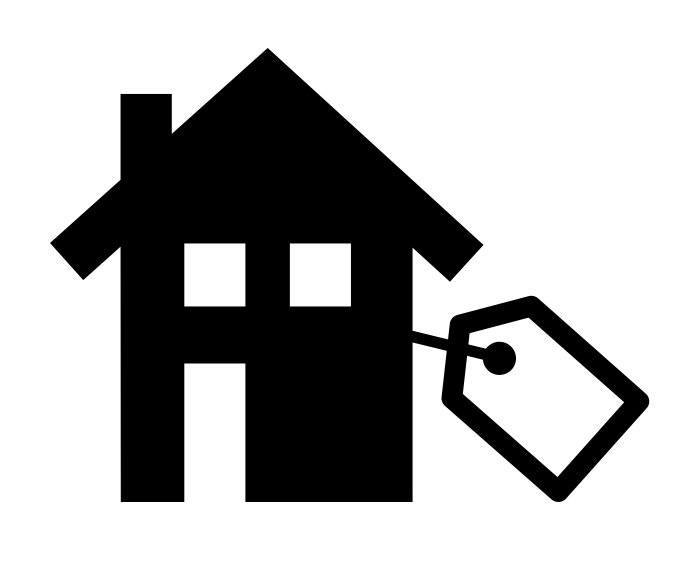

Seul Living (서울 리빙) adalah perusahaan real estate terkemuka yang berdedikasi untuk memfasilitasi transaksi jual beli apartemen premium di seluruh Korea Selatan. Dengan fokus pada integritas, keahlian pasar yang mendalam, dan layanan pelanggan yang luar biasa, kami menjadi mitra terpercaya bagi individu dan investor yang mencari hunian ideal atau peluang investasi properti yang menguntungkan di salah satu pasar real estat paling dinamis di Asia.

#Stake Holder

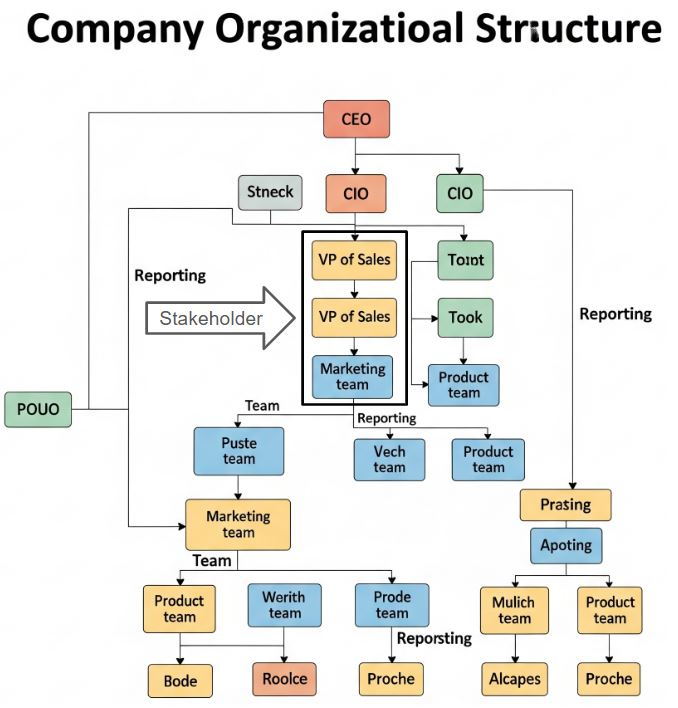

#Latar Belakang
Dengan dinamika pasar properti Korea yang terus berkembang, penentuan harga apartemen yang akurat dan klasifikasi kategori kemewahan menjadi semakin kompleks, sering kali bergantung pada analisis manual yang memakan waktu dan rentan bias. Menyadari tantangan ini, "Seoul Living" hadir sebagai pionir di industri jual beli apartemen Korea, mengintegrasikan teknologi machine learning mutakhir untuk merevolusi proses valuasi dan segmentasi jenis apartemen.

#Problem Statement
Pemanfaatan machine learning dalam penentuan harga suatu apartemen dan menentukan apakah suatu apartment tergolong mewah atau tidak, guna mentukan strategi sales dan marketing yang sesuai. Dengan menggunakan strategi sales dan marketing yang sesuai diharapakn perushaan memperoleh keuntungan yang lebih baik.

# Import Libraries

In [1]:
pip install category_encoders

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor
from category_encoders import BinaryEncoder

# Understanding Dataset and Preprocessing Dataset

**Information About Dataset**



**Column Description**

| **Columns Name** | **Column Description**                                   |
| ---------------- | -------------------------------------------------------- |
| **Hallway Type**       |Apartment type                 |
| **TimeToSubway**     | Time needed to the nearest subway station        |
| **SubwayStation**   | The name of the nearest subway station        |
| **N_FacilitiesNearBy(ETC)**     | The number of facilities nearby |
| **N_FacilitiesNearBy(PublicOffice)** | The number of public office facilities nearby             |
| **N_SchoolNearBy(University)**      | The number of universities nearby                  |
| **N_Parkinglot(Basement)**         | The number of the parking lot                     |
| **YearBuilt**       | The year the apartment was built                   |
| **N_FacilitiesInApt**    | Number of facilities in the apartment                |
| **Size(sqft)**     | The apartment size (in square feet)           |
| **SalePrice**  | The apartment price (Won).                   |

**Information About Dataset**



**Column Description**

| **Nama kolom** | **Deskripsi kolom**                                   |
| ---------------- | -------------------------------------------------------- |
| **Hallway Type**       |Tipe apartemen                 |
| **TimeToSubway**     | Waktu yang dibutuhkan ke stasiun kereta bawah tanah terdekat       |
| **SubwayStation**   | Nama stasiun kereta bawah tanah terdekat        |
| **N_FacilitiesNearBy(ETC)**     | Jumlah fasilitas di dekatnya |
| **N_FacilitiesNearBy(PublicOffice)** | Jumlah fasilitas kantor publik di dekatnya             |
| **N_SchoolNearBy(University)**      | Jumlah universitas di dekatnya                  |
| **N_Parkinglot(Basement)**         | Jumlah tempat parkir         |
| **YearBuilt**       | Tahun apartemen dibangun     |
| **N_FacilitiesInApt**    | Jumlah fasilitas di apartemen            |
| **Size(sqft)**     | Ukuran apartemen (dalam kaki persegi)    |
| **SalePrice**  | Harga apartemen (Menang)       |

In [3]:
#conect to google derive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#make dataframe from dataset
df = pd.read_csv('/content/drive/MyDrive/Bootcamp/Purwadhika/Capstone 3/data_daegu_apartment.csv')

In [5]:
#Displays summary information from the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [6]:
#Check Duplicate from dataset
df.duplicated().sum()

np.int64(1422)

In [7]:
#Drop Duplicate
df.drop_duplicates(inplace=True)

In [8]:
#Check Duplicate from dataset again
df.duplicated().sum()

np.int64(0)

In [9]:
#Display 5 data from dataset
df.head(5)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [10]:
#check whether the column names in the data have changed or not
df.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

In [11]:
#Displays a summary of descriptive statistics of the data used.
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [12]:
#Displays the number of unique values ​​from each column in the database and displays the values
for i in df.columns:
  print(f'''
-------------------
{i}:
jumlah Unique Value = {len(df[i].unique())}

Unique Value :

{df[i].unique()}
-------------------''')


-------------------
HallwayType:
jumlah Unique Value = 3

Unique Value :

['terraced' 'mixed' 'corridor']
-------------------

-------------------
TimeToSubway:
jumlah Unique Value = 5

Unique Value :

['0-5min' '10min~15min' '15min~20min' '5min~10min' 'no_bus_stop_nearby']
-------------------

-------------------
SubwayStation:
jumlah Unique Value = 8

Unique Value :

['Kyungbuk_uni_hospital' 'Chil-sung-market' 'Bangoge' 'Sin-nam'
 'Banwoldang' 'no_subway_nearby' 'Myung-duk' 'Daegu']
-------------------

-------------------
N_FacilitiesNearBy(ETC):
jumlah Unique Value = 4

Unique Value :

[0. 1. 5. 2.]
-------------------

-------------------
N_FacilitiesNearBy(PublicOffice):
jumlah Unique Value = 8

Unique Value :

[3. 5. 7. 1. 4. 2. 6. 0.]
-------------------

-------------------
N_SchoolNearBy(University):
jumlah Unique Value = 6

Unique Value :

[2. 1. 3. 4. 5. 0.]
-------------------

-------------------
N_Parkinglot(Basement):
jumlah Unique Value = 20

Unique Value :

[1270.   

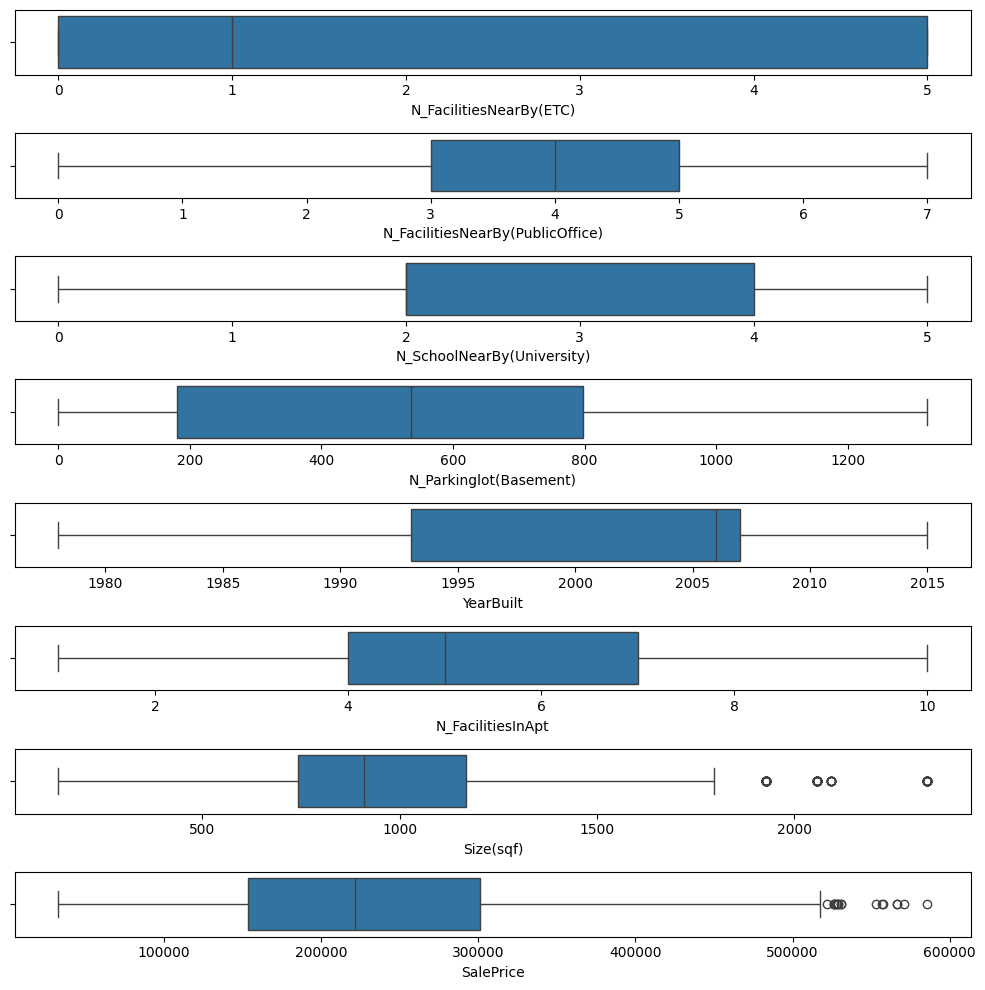

In [13]:
#Checking all outliers in 'Sales','Profit','Discount' and 'Quantity' columns using boxplot.

feature = df.select_dtypes(include='number').columns
plt.figure(figsize=(10, 10))

for idx, col in enumerate(feature, start=1):
    plt.subplot(len(feature), 1, idx)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

In [14]:
#We will analyze outliers further using the IQR method
outliers_list = []
l1 = []
l2 = []
l3 = []
for column in feature:
    # Calculate Q1, Q3, and IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
    # Calculate bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
  outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
  outliers = df[outliers_condition]
    # Store information in list
  l1.append(lower_bound),
  l2.append(upper_bound),
  l3.append(outliers_condition.sum())
df_outlier = pd.DataFrame({'Lower Bound':l1,'Upper Bound':l2,'sum of outlier':l3},index=feature)
df_outlier

,Lower Bound,Upper Bound,sum of outlier
N_FacilitiesNearBy(ETC),-7.5,12.5,0
N_FacilitiesNearBy(PublicOffice),0.0,8.0,0
N_SchoolNearBy(University),-1.0,7.0,0
N_Parkinglot(Basement),-744.5,1723.5,0
YearBuilt,1972.0,2028.0,0
N_FacilitiesInApt,-0.5,11.5,0
Size(sqf),107.0,1803.0,84
SalePrice,-67478.5,521901.5,17


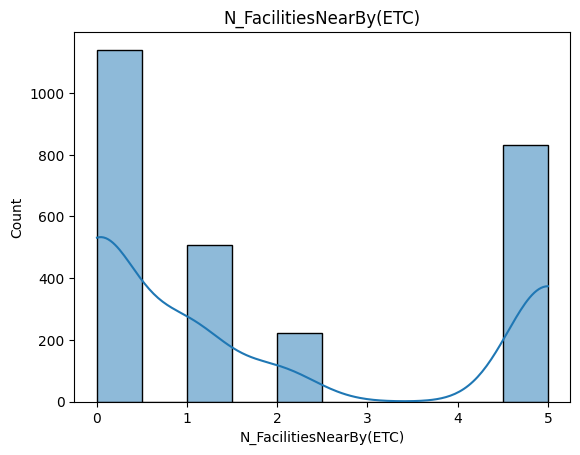

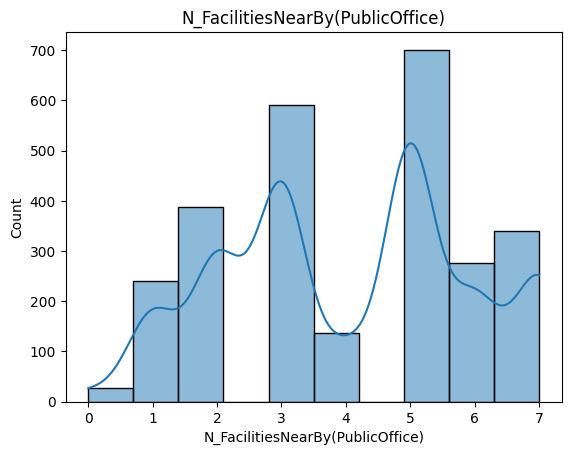

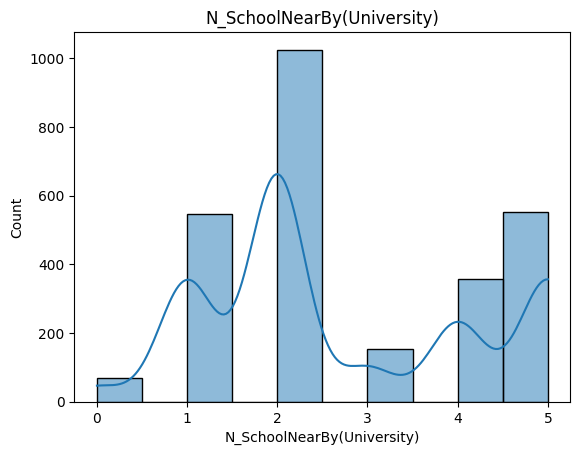

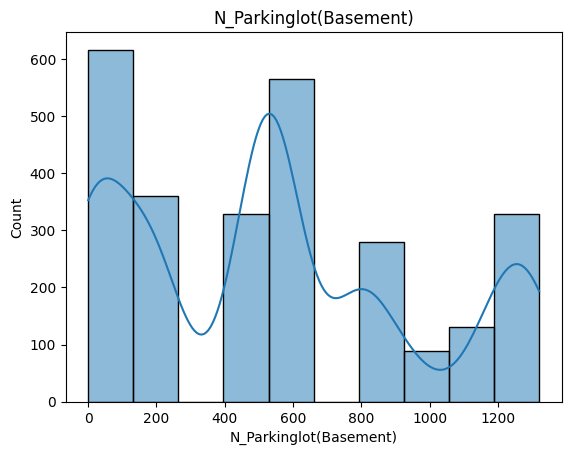

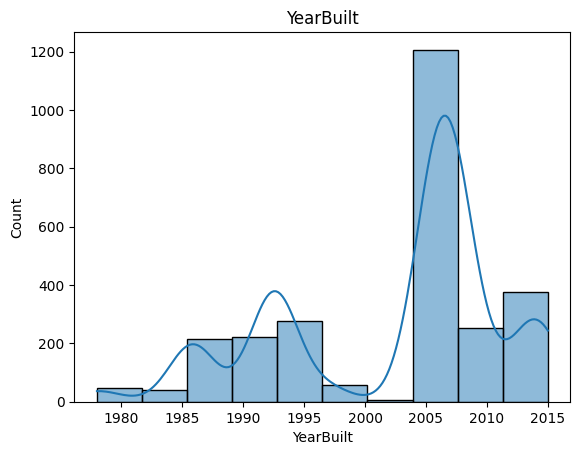

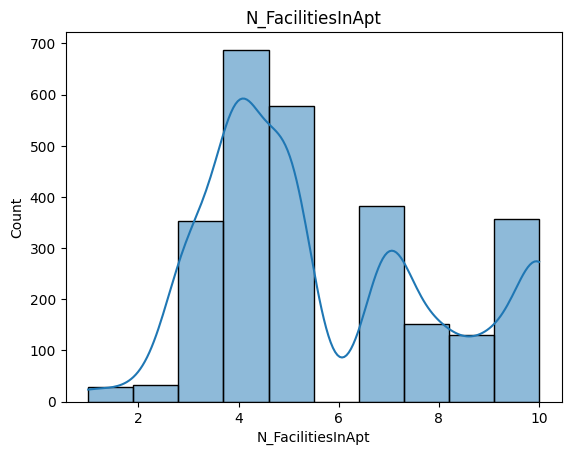

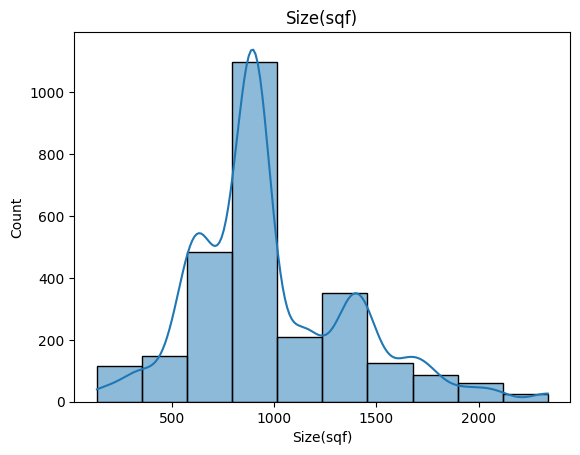

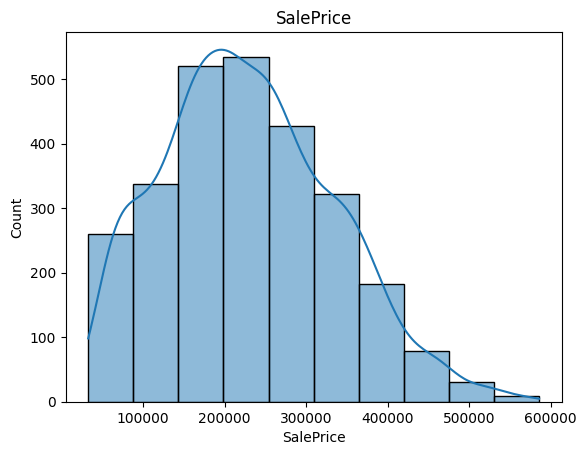

In [15]:
#Check Dataset Normality for Sales, Profit, Discount and Quantity data
for i in feature:
  sns.histplot(df[i], bins=10, kde=True)
  plt.title(i)
  plt.show()

#Feature Enginering

##Total Fasilitas Dekat (Overall Proximity Score)
Total Fasilitas Dekat (Overall Proximity Score): Jumlahkan N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), dan N_SchoolNearBy(University). Ini memberikan skor komprehensif tentang seberapa "lengkap" lingkungan sekitar apartemen.

In [26]:
df['Total_Facilities'] = df['N_FacilitiesNearBy(ETC)'] + df['N_FacilitiesNearBy(PublicOffice)'] + df['N_SchoolNearBy(University)']
df.head()


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Apartment_price_per_square_meter,Luxury_apartment,Total_Facilities
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017,249.471521,1,5.0
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442,164.597374,0,7.0
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946,111.014337,0,11.0
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486,181.056893,0,14.0
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504,178.717154,1,3.0


##FasilitasPerSqFt (Apartemen)
FasilitasPerSqFt (Apartemen): N_FacilitiesInApt / Size(sqft). Ini mengukur seberapa padat fasilitas di dalam apartemen relatif terhadap ukurannya.

In [27]:
df['FacilitiesPerSqFt_(Apartemen)'] = df['N_FacilitiesInApt'] / df['Size(sqf)']
df.head()


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Apartment_price_per_square_meter,Luxury_apartment,Total_Facilities,FacilitiesPerSqFt_(Apartemen)
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017,249.471521,1,5.0,0.007210
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442,164.597374,0,7.0,0.004376
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946,111.014337,0,11.0,0.008961
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486,181.056893,0,14.0,0.007659
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504,178.717154,1,3.0,0.002869


##FasilitasPerSqFt (Lingkungan)
FasilitasPerSqFt (Lingkungan): Total Fasilitas Dekat / Size(sqft) (jika ada data luas area lingkungan yang relevan, jika tidak, mungkin kurang relevan langsung).

In [28]:
df['FacilitiesPerSqFt_(Environment)'] = df['Total_Facilities'] / df['Size(sqf)']
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Apartment_price_per_square_meter,Luxury_apartment,Total_Facilities,FacilitiesPerSqFt_(Apartemen),FacilitiesPerSqFt_(Environment)
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017,249.471521,1,5.0,0.007210,0.003605
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442,164.597374,0,7.0,0.004376,0.007659
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946,111.014337,0,11.0,0.008961,0.019713
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486,181.056893,0,14.0,0.007659,0.015317
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504,178.717154,1,3.0,0.002869,0.001721


##Usia Apartemen (ApartmentAge)
Usia Apartemen (ApartmentAge): Tahun Sekarang - YearBuilt. Usia apartemen seringkali berkorelasi negatif dengan harga

In [29]:
#assuming the current year is 2025
df['Apartment_Age'] = 2025 - df['YearBuilt']
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Apartment_price_per_square_meter,Luxury_apartment,Total_Facilities,FacilitiesPerSqFt_(Apartemen),FacilitiesPerSqFt_(Environment),Apartment_Age
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017,249.471521,1,5.0,0.007210,0.003605,18
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442,164.597374,0,7.0,0.004376,0.007659,39
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946,111.014337,0,11.0,0.008961,0.019713,28
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486,181.056893,0,14.0,0.007659,0.015317,20
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504,178.717154,1,3.0,0.002869,0.001721,19


##harga apartemen permeter persegi
harga apartemen permeter persegi : SalePrice / Size(sqf).menunjukan harga apartemen permeter persegi

In [30]:
df['Apartment_price_per_square_meter'] = df['SalePrice']/df['Size(sqf)']
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Apartment_price_per_square_meter,Luxury_apartment,Total_Facilities,FacilitiesPerSqFt_(Apartemen),FacilitiesPerSqFt_(Environment),Apartment_Age
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017,249.471521,1,5.0,0.007210,0.003605,18
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442,164.597374,0,7.0,0.004376,0.007659,39
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946,111.014337,0,11.0,0.008961,0.019713,28
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486,181.056893,0,14.0,0.007659,0.015317,20
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504,178.717154,1,3.0,0.002869,0.001721,19


##Luxury_apartment
Luxury_apartment : melakukan pelabelan apakah suatu apartemen termasuk mewah atau bukan diamana apartemen yang berada di atas rata rata tergolong apartemen mewah sedangkan yang ada dibawah rata rata bukan apartemen mewah.

In [31]:
#show dataframe up to 100 columns
pd.options.display.max_columns = 100

In [32]:
#create labels for luxury and non-luxury homes
#luxury homes are marked with 1
#non-luxury homes are marked with 0

df['Luxury_apartment'] = pd.qcut(
    df['SalePrice'],
    q=2,
    labels=[0, 1]
).astype(int)

df_luxury_apartment_analysis = df.drop('SalePrice',axis=1)
df_luxury_apartment_analysis.head(5)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),Apartment_price_per_square_meter,Luxury_apartment,Total_Facilities,FacilitiesPerSqFt_(Apartemen),FacilitiesPerSqFt_(Environment),Apartment_Age
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,249.471521,1,5.0,0.007210,0.003605,18
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,164.597374,0,7.0,0.004376,0.007659,39
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,111.014337,0,11.0,0.008961,0.019713,28
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,181.056893,0,14.0,0.007659,0.015317,20
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,178.717154,1,3.0,0.002869,0.001721,19


#Luxury apartment analysis

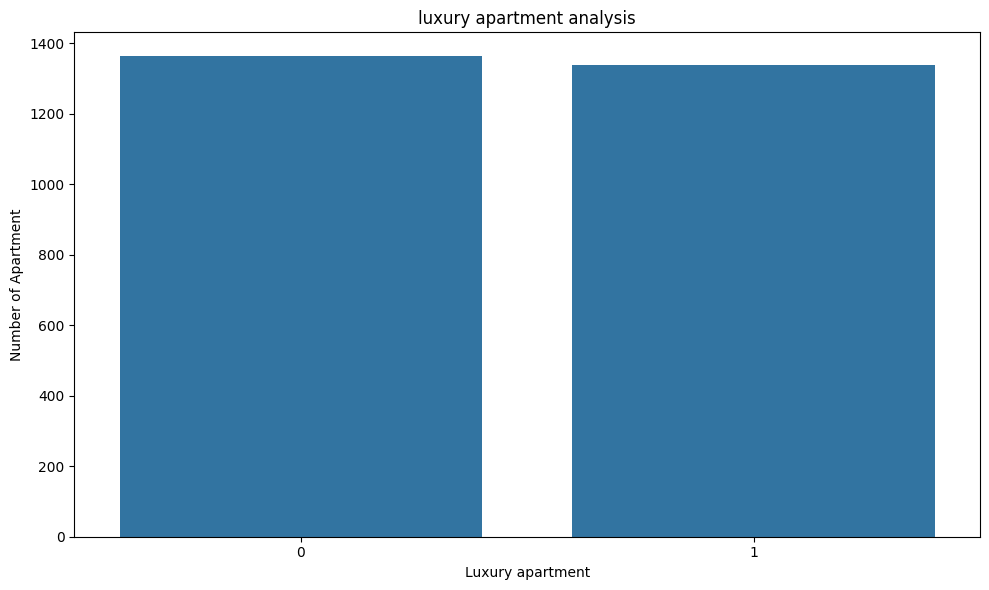

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_luxury_apartment_analysis, x='Luxury_apartment', order=df_luxury_apartment_analysis['Luxury_apartment'].value_counts().index)
plt.title('luxury apartment analysis')
plt.xlabel('Luxury apartment')
plt.ylabel('Number of Apartment')
plt.tight_layout()
plt.show()

#Machine learning model (klasifikasi)

Model machine learning klasifikasi digunakan untuk menentukan apakah suatu apartemen termasuk tipe apartemen mewah atau bukan.
Model machine learning klasifikasi akan dibuat dengan ketentuan sebagai berikut :

1. Dataset akan dibagi menjadi 3 yaitu :
* 60 % untuk train dataset
* 20 % untuk test set
* 20% untuk validation data
2. Model yang digunakan adalah :
* Decision tree classifier
* Random forest classifier
* Xgboost classifier
3. Ketiga model akan menerapkan hyperparameter tuning menggunakan grid search cross validation.
4. Ketiga model akan di assembly dengan metode voting.


##spliting dataset

In [33]:
# The dataset used in the classification modeling is "luxury_apartment"
# Data train (60%), data test(20%), data validation(20%)

X = df_luxury_apartment_analysis.drop(['Luxury_apartment'], axis=1)
y = df_luxury_apartment_analysis[['Luxury_apartment']]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=100,stratify = y)
X = X_temp
y = y_temp
X_test, X_validation, y_test, y_validation = train_test_split(X, y, test_size=0.5, random_state=100,stratify = y)

##hyper parameter tuning using grid search

###Decision Tree

In [34]:
#Processor creation for machine learning models
df_luxury_apartment_analysis_numeric = X.select_dtypes(include='number').columns
df_luxury_apartment_analysis_hot = ['HallwayType']
df_luxury_apartment_analysis_binary = ['TimeToSubway', 'SubwayStation']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='constant', fill_value=-999), df_luxury_apartment_analysis_numeric),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), df_luxury_apartment_analysis_hot),
        ('binary', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), df_luxury_apartment_analysis_binary)
    ],
    remainder='passthrough'
)

print("--- Decision Tree dengan Pipeline dan GridSearchCV ---")
#Pipeline creation for machine learning models
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

#Determining grid search parameters for machine learning models
param_grid_dt = {
    'dt__max_depth': [3, 5, 7, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__criterion': ['gini', 'entropy']
}

# GridSearch Initialization
grid_search_dt = GridSearchCV(estimator=pipeline_dt,
                              param_grid=param_grid_dt,
                              cv=5,
                              scoring=['accuracy', 'recall', 'precision', 'f1'],
                              n_jobs=-1,
                              verbose=1,
                              refit='recall')

# Perform Grid Search on training data
grid_search_dt.fit(X_train, y_train)

print(f"\nBest parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best cross-validation accuracy for Decision Tree: {grid_search_dt.best_score_:.4f}")

# Evaluate the best model on the test set
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Test Set Accuracy (Decision Tree): {accuracy_dt:.4f}")

target_names_luxury = ['Not Luxury', 'Luxury']

print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt, target_names=target_names_luxury))
print("-" * 70)

--- Decision Tree dengan Pipeline dan GridSearchCV ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best parameters for Decision Tree: {'dt__criterion': 'entropy', 'dt__max_depth': 7, 'dt__min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.9950
Test Set Accuracy (Decision Tree): 0.9796
Classification Report (Decision Tree):
               precision    recall  f1-score   support

  Not Luxury       0.98      0.98      0.98       273
      Luxury       0.98      0.98      0.98       267

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

----------------------------------------------------------------------


In [35]:
best_dt_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(fill_value=-999,
                                                                strategy='constant'),
                                                  Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'Apartment_price_per_square_meter',
       'To...
       'FacilitiesPerSqFt_(Environment)', 'Apartment_Age'],
      dtype='object')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HallwayType']),
                                                 ('binary',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['TimeToSubway',
                                                   'SubwayStation'])])),
                ('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        random_state=42))])

###Random Forest

In [36]:
print("\n--- Random Forest dengan Pipeline dan GridSearchCV ---")

#Pipeline creation for machine learning models
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

#Determining grid search parameters for machine learning models
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_leaf': [1, 2, 4],
}

# GridSearch Initialization
grid_search_rf = GridSearchCV(estimator=pipeline_rf,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring=['accuracy', 'recall', 'precision', 'f1'],
                              n_jobs=-1,
                              verbose=1,
                              refit='recall')

# Perform Grid Search on training data
grid_search_rf.fit(X_train, y_train)

print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Set Accuracy (Random Forest): {accuracy_rf:.4f}")
target_names_luxury = ['Not Luxury', 'Luxury']

print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf, target_names=target_names_luxury))
print("-" * 70)



--- Random Forest dengan Pipeline dan GridSearchCV ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for Random Forest: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9863
Test Set Accuracy (Random Forest): 0.9796
Classification Report (Random Forest):
               precision    recall  f1-score   support

  Not Luxury       0.97      0.99      0.98       273
      Luxury       0.98      0.97      0.98       267

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

----------------------------------------------------------------------


In [37]:
grid_search_rf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         SimpleImputer(fill_value=-999,
                                                                                       strategy='constant'),
                                                                         Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'Apartment...
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['TimeToSubway',
                                                                          'SubwayStation'])])),
                                       ('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 10, None],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__n_estimators': [50, 100, 200]},
             refit='recall', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=1)

###XGBoost

In [38]:
target_names_luxury = ['Not Luxury', 'Luxury']
print("\n--- XGBoost dengan Pipeline dan GridSearchCV ---")

#Pipeline creation for machine learning models
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(objective='multi:softmax',
                          num_class=len(target_names_luxury),
                          eval_metric='mlogloss', # Diperlukan untuk training
                          use_label_encoder=False,
                          random_state=42))
])

#Determining grid search parameters for machine learning models
param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 150], # Jumlah boosting rounds
    'xgb__learning_rate': [0.01, 0.1, 0.2], # Tingkat pembelajaran
    'xgb__max_depth': [3, 5, 7], # Kedalaman maksimum pohon
    # 'xgb__colsample_bytree': [0.7, 1.0] # Proporsi kolom yang diambil untuk setiap pohon
}

# GridSearch Initialization
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb,
                               param_grid=param_grid_xgb,
                               cv=5,
                               scoring=['accuracy', 'recall', 'precision', 'f1'],
                               n_jobs=-1,
                               verbose=1,
                               refit='recall'
                               )

# Perform Grid Search on training data
grid_search_xgb.fit(X_train, y_train)

print(f"\nBest parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best cross-validation accuracy for XGBoost: {grid_search_xgb.best_score_:.4f}")

# Evaluate the best model on the test set
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Test Set Accuracy (XGBoost): {accuracy_xgb:.4f}")

print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb, target_names=target_names_luxury))
print("-" * 70)



--- XGBoost dengan Pipeline dan GridSearchCV ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for XGBoost: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 100}
Best cross-validation accuracy for XGBoost: 0.9925
Test Set Accuracy (XGBoost): 0.9833
Classification Report (XGBoost):
               precision    recall  f1-score   support

  Not Luxury       0.99      0.98      0.98       273
      Luxury       0.98      0.99      0.98       267

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

----------------------------------------------------------------------


In [39]:
best_xgb_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(fill_value=-999,
                                                                strategy='constant'),
                                                  Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'Apartment_price_per_square_meter',
       'To...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None, num_class=2,
                               num_parallel_tree=None, ...))])

###voting examble

In [40]:
# Define the list of estimators (pipeline) to be used in the ensemble.
estimators = [
    ('decision_tree_pipeline', best_dt_model),
    ('random_forest_pipeline', best_rf_model),
    ('xgboost_pipeline', best_xgb_model)
]

# VotingClassifier Initialization
ensemble_voting_model = VotingClassifier(estimators=estimators, voting='soft')

# Train an ensemble model on training data
print("\nMelatih model Ensemble (Hard Voting)...")
ensemble_voting_model.fit(X_train, y_train)
print("Pelatihan Selesai!")

# Make predictions on the test set
y_pred_ensemble = ensemble_voting_model.predict(X_test)

# Ensemble model evaluation on the test set
recall_ensemble = recall_score(y_test, y_pred_ensemble)
print(f"\nEnsemble (Hard Voting) Test Set Accuracy: {recall_ensemble:.4f}")

print("\nClassification Report (Ensemble Hard Voting):\n")
print(classification_report(y_test, y_pred_ensemble, target_names=target_names_luxury))

print("-" * 70)


Melatih model Ensemble (Hard Voting)...
Pelatihan Selesai!

Ensemble (Hard Voting) Test Set Accuracy: 0.9888

Classification Report (Ensemble Hard Voting):

              precision    recall  f1-score   support

  Not Luxury       0.99      0.98      0.98       273
      Luxury       0.98      0.99      0.98       267

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

----------------------------------------------------------------------


###applay ml model in data validation

In [41]:
# Train an ensemble model on training data
print("\nMelatih model Ensemble (Voting)...")
ensemble_voting_model.fit(X_train, y_train)
print("Pelatihan Selesai!")

# Make predictions on the validation set
y_pred_ensemble = ensemble_voting_model.predict(X_validation)

# Evaluate ensemble models on the validation set
recall_ensemble = recall_score(y_validation, y_pred_ensemble)
print(f"\nEnsemble (Voting) Test Set recall: {recall_ensemble:.4f}")

print("\nClassification Report (Ensemble Voting):\n")
print(classification_report(y_validation, y_pred_ensemble, target_names=target_names_luxury))

print("-" * 70)


Melatih model Ensemble (Voting)...
Pelatihan Selesai!

Ensemble (Voting) Test Set recall: 0.9739

Classification Report (Ensemble Voting):

              precision    recall  f1-score   support

  Not Luxury       0.97      0.97      0.97       273
      Luxury       0.97      0.97      0.97       268

    accuracy                           0.97       541
   macro avg       0.97      0.97      0.97       541
weighted avg       0.97      0.97      0.97       541

----------------------------------------------------------------------


##ROC Curve and Precision-Recall curve (machine learning model clasification)

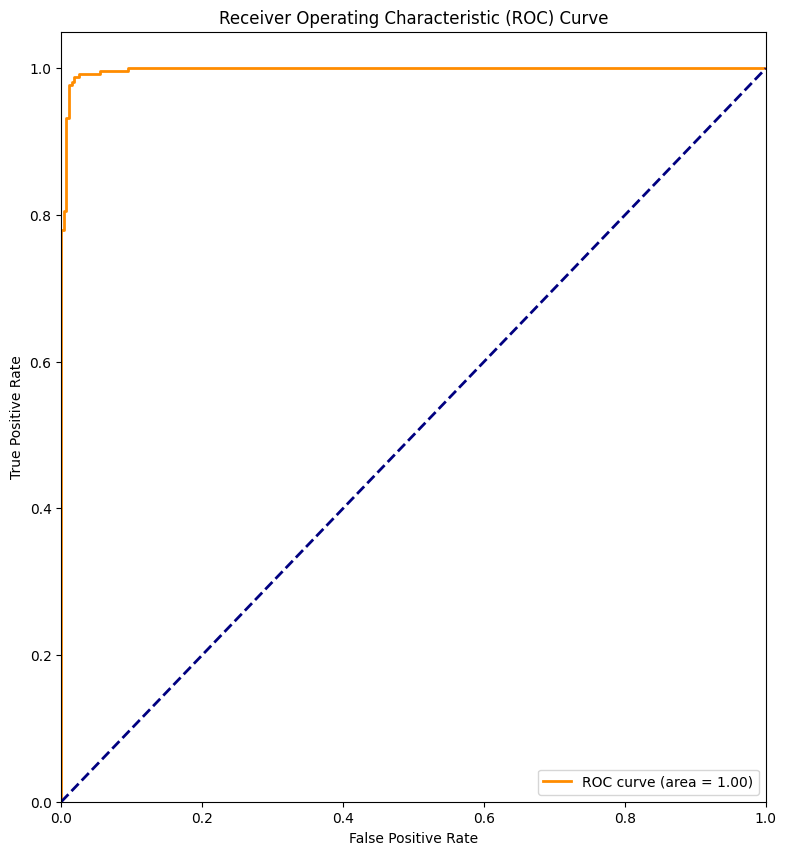

In [42]:
y_probability = ensemble_voting_model.predict_proba(X_test)[:, 1]
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

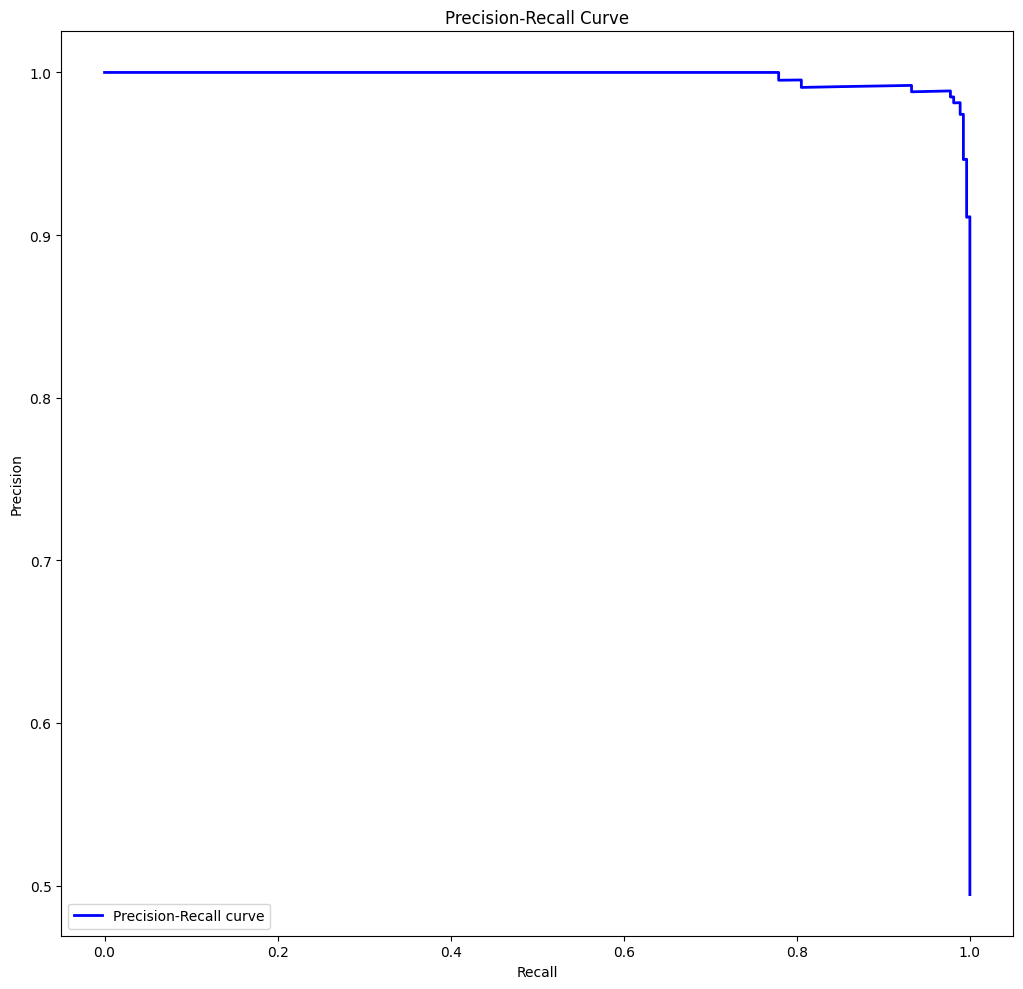

In [44]:
# PRC Curve
precision, recall, _ = precision_recall_curve(y_test, y_probability)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

#Machine learning model (regresi)
Model machine learning regresi digunakan untuk menentukan harga yang optimal untuk apartemen.
Model machine learning regresi akan dibuat dengan ketentuan sebagai berikut :

1. Dataset akan dibagi menjadi 3 yaitu :
* 60 % untuk train dataset
* 20 % untuk test set
* 20% untuk validation data
2. Model yang digunakan adalah :
* Decision tree regressor
* Random forest regressor
* Xgboost regressor
3. Ketiga model akan menerapkan hyperparameter tuning menggunakan grid search cross validation.
4. Ketiga model akan di assembly dengan metode voting.


##Spliting Dataset

In [45]:
df_data_for_regression = df.drop('Luxury_apartment',axis = 1)

In [46]:
# The dataset used in the classification modeling is "df_data_for_regression"
# Data train (60%), data test(20%), data validation(20%)
X = df_data_for_regression.drop(['SalePrice'], axis=1)
y = df_data_for_regression['SalePrice']
X_train_r, X_temp_r, y_train_r, y_temp_r = train_test_split(X, y, test_size=0.4, random_state=100)
X = X_temp_r
y = y_temp_r
X_test_r, X_validation_r, y_test_r, y_validation_r = train_test_split(X, y, test_size=0.5, random_state=100)

##Hyper parameter tuning

###Decision Tree

In [47]:
#Processor creation for machine learning models

df_data_for_regression_numeric = X.select_dtypes(include='number').columns
df_data_for_regression_hot = ['HallwayType']
df_data_for_regression_binary = ['TimeToSubway', 'SubwayStation']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='constant', fill_value=-999), df_data_for_regression_numeric), # Use filtered numerical features
        ('ohe', OneHotEncoder(handle_unknown='ignore'), df_data_for_regression_hot),
        ('binary', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), df_data_for_regression_binary)
    ],
    remainder='passthrough'
)

print("--- Decision Tree dengan Pipeline dan GridSearchCV ---")
#Pipeline creation for machine learning models
pipeline_dt_r = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()), # Standardize features
    ('dt', DecisionTreeRegressor(random_state=42))
])
#Determining grid search parameters for machine learning models
param_grid_dt_r = {
    'dt__max_depth': [3, 5, 7, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# GridSearch Initialization
grid_search_dt_r = GridSearchCV(estimator=pipeline_dt_r,
                              param_grid=param_grid_dt_r,
                              cv=5,
                              scoring=['r2', 'neg_mean_squared_error'],
                              n_jobs=-1,
                              verbose=1,
                              refit='r2')

# Perform Grid Search on training data
grid_search_dt_r.fit(X_train_r, y_train_r)

print(f"\nBest parameters for Decision Tree: {grid_search_dt_r.best_params_}")
print(f"Best cross-validation R-squared for Decision Tree: {grid_search_dt_r.best_score_:.4f}")

# Evaluate the best model on the test set
best_dt_model_r = grid_search_dt_r.best_estimator_
y_pred_dt = best_dt_model_r.predict(X_test_r)
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_dt = mean_squared_error(y_test_r, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test_r, y_pred_dt)


print(f"Test Set Mean Squared Error (Decision Tree): {mse_dt:.4f}")
print(f"Test Set Root Mean Squared Error (Decision Tree): {rmse_dt:.4f}")
print(f"Test Set R-squared (Decision Tree): {r2_dt:.4f}")

print("-" * 70)

--- Decision Tree dengan Pipeline dan GridSearchCV ---
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters for Decision Tree: {'dt__criterion': 'absolute_error', 'dt__max_depth': None, 'dt__min_samples_split': 2}
Best cross-validation R-squared for Decision Tree: 0.9883
Test Set Mean Squared Error (Decision Tree): 106979661.5130
Test Set Root Mean Squared Error (Decision Tree): 10343.0973
Test Set R-squared (Decision Tree): 0.9903
----------------------------------------------------------------------


In [48]:
best_dt_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(fill_value=-999,
                                                                strategy='constant'),
                                                  Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'Apartment_price_per_square_meter',
       'To...
       'FacilitiesPerSqFt_(Environment)', 'Apartment_Age'],
      dtype='object')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HallwayType']),
                                                 ('binary',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['TimeToSubway',
                                                   'SubwayStation'])])),
                ('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        random_state=42))])

###Random Forest

In [49]:
print("\n--- Random Forest dengan Pipeline dan GridSearchCV ---")

#Pipeline creation for machine learning models
pipeline_rf_r = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

#Determining grid search parameters for machine learning models
param_grid_rf_r = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_leaf': [1, 2, 4],
}

# GridSearch Initialization
grid_search_rf_r = GridSearchCV(estimator=pipeline_rf_r,
                              param_grid=param_grid_rf_r,
                              cv=5,
                              scoring=['r2', 'neg_mean_squared_error'],
                              n_jobs=-1,
                              verbose=1,
                              refit='r2')
# Perform Grid Search on training data
grid_search_rf_r.fit(X_train_r, y_train_r)

print(f"\nBest parameters for Decision Tree: {grid_search_rf_r.best_params_}")
print(f"Best cross-validation R-squared for Decision Tree: {grid_search_rf_r.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf_model_r = grid_search_rf_r.best_estimator_
y_pred_dt = best_rf_model_r.predict(X_test_r)
mse_dt = mean_squared_error(y_test_r, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test_r, y_pred_dt)

print(f"Test Set Mean Squared Error (Decision Tree): {mse_dt:.4f}")
print(f"Test Set Root Mean Squared Error (Decision Tree): {rmse_dt:.4f}")
print(f"Test Set R-squared (Decision Tree): {r2_dt:.4f}")

print("-" * 70)


--- Random Forest dengan Pipeline dan GridSearchCV ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for Decision Tree: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 100}
Best cross-validation R-squared for Decision Tree: 0.9932
Test Set Mean Squared Error (Decision Tree): 51464888.9500
Test Set Root Mean Squared Error (Decision Tree): 7173.9033
Test Set R-squared (Decision Tree): 0.9954
----------------------------------------------------------------------


In [50]:
best_dt_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(fill_value=-999,
                                                                strategy='constant'),
                                                  Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'Apartment_price_per_square_meter',
       'To...
       'FacilitiesPerSqFt_(Environment)', 'Apartment_Age'],
      dtype='object')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HallwayType']),
                                                 ('binary',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['TimeToSubway',
                                                   'SubwayStation'])])),
                ('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        random_state=42))])

###XGBoost

In [51]:
df_luxury_apartment_analysis_numeric = X.select_dtypes(include='number').columns
df_luxury_apartment_analysis_hot = ['HallwayType']
df_luxury_apartment_analysis_binary = ['TimeToSubway', 'SubwayStation']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='constant', fill_value=-999), df_luxury_apartment_analysis_numeric), # Use filtered numerical features
        ('ohe', OneHotEncoder(handle_unknown='ignore'), df_luxury_apartment_analysis_hot),
        ('binary', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), df_luxury_apartment_analysis_binary)
    ],
    remainder='passthrough'
)

In [52]:
print("\n--- XGBoost dengan Pipeline dan GridSearchCV ---")

#Pipeline creation for machine learning models
pipeline_xgb_r = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(objective='reg:squarederror',
                         use_label_encoder=False,
                         random_state=42))
])

#Determining grid search parameters for machine learning models
param_grid_xgb_r = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
}

# GridSearch Initialization
grid_search_xgb_r = GridSearchCV(estimator=pipeline_xgb_r,
                               param_grid=param_grid_xgb_r,
                               cv=5,
                               scoring=['r2', 'neg_mean_squared_error'],
                               n_jobs=-1,
                               verbose=1,
                               refit='r2'
                               )
# Perform Grid Search on training data
grid_search_xgb_r.fit(X_train, y_train_r)

# Evaluate the best model on the test set
best_xgb_model_r = grid_search_xgb_r.best_estimator_
y_pred_xgb = best_xgb_model_r.predict(X_test_r)
mse_xgb = mean_squared_error(y_test_r, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_r, y_pred_xgb)

print(f"\nBest parameters for XGBoost: {grid_search_xgb_r.best_params_}")
print(f"Best cross-validation R-squared for XGBoost: {grid_search_xgb_r.best_score_:.4f}")
print(f"Test Set Mean Squared Error (XGBoost): {mse_xgb:.4f}")
print(f"Test Set Root Mean Squared Error (XGBoost): {rmse_xgb:.4f}")
print(f"Test Set R-squared (XGBoost): {r2_xgb:.4f}")

print("-" * 70)


--- XGBoost dengan Pipeline dan GridSearchCV ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for XGBoost: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 50}
Best cross-validation R-squared for XGBoost: -0.0099
Test Set Mean Squared Error (XGBoost): 11152582656.0000
Test Set Root Mean Squared Error (XGBoost): 105605.7889
Test Set R-squared (XGBoost): -0.0070
----------------------------------------------------------------------


###voting examble

In [53]:
# Define the list of estimators (pipeline) to be used in the ensemble.
estimators_r = [
    ('decision_tree_pipeline', best_dt_model_r),
    ('random_forest_pipeline', best_rf_model_r),
    ('xgboost_pipeline', best_xgb_model_r)
]

# VotingClassifier Initialization
ensemble_voting_model_r = VotingRegressor(estimators=estimators_r)

# Train an ensemble model on training data
print("\nMelatih model Ensemble (Voting Regressor)...")
ensemble_voting_model_r.fit(X_train_r, y_train_r)
print("Pelatihan Selesai!")

# Make predictions on the test set
y_pred_ensemble_r = ensemble_voting_model_r.predict(X_test_r)

# Ensemble model evaluation on the test set
mse_ensemble_r = mean_squared_error(y_test_r, y_pred_ensemble_r)
rmse_ensemble_r = np.sqrt(mse_ensemble_r)
r2_ensemble_r = r2_score(y_test_r, y_pred_ensemble_r)


print(f"\nEnsemble (Voting Regressor) Test Set Mean Squared Error: {mse_ensemble_r:.4f}")
print(f"Ensemble (Voting Regressor) Test Set Root Mean Squared Error: {rmse_ensemble_r:.4f}")
print(f"Ensemble (Voting Regressor) Test Set R-squared: {r2_ensemble_r:.4f}")

print("-" * 70)


Melatih model Ensemble (Voting Regressor)...
Pelatihan Selesai!

Ensemble (Voting Regressor) Test Set Mean Squared Error: 705993511.7911
Ensemble (Voting Regressor) Test Set Root Mean Squared Error: 26570.5384
Ensemble (Voting Regressor) Test Set R-squared: 0.9363
----------------------------------------------------------------------


###applay ml model in data validation

In [54]:
# Make predictions on the validation set
y_pred_ensemble_r = ensemble_voting_model.predict(X_validation_r)

# Evaluate ensemble models on the validation set
mse_ensemble_r = mean_squared_error(y_validation_r, y_pred_ensemble_r)
rmse_ensemble_r = np.sqrt(mse_ensemble_r)
r2_ensemble_r = r2_score(y_validation_r, y_pred_ensemble_r)


print(f"\nEnsemble (Voting Regressor) Test Set Mean Squared Error: {mse_ensemble_r:.4f}")
print(f"Ensemble (Voting Regressor) Test Set Root Mean Squared Error: {rmse_ensemble_r:.4f}")
print(f"Ensemble (Voting Regressor) Test Set R-squared: {r2_ensemble_r:.4f}")

print("-" * 70)


Ensemble (Voting Regressor) Test Set Mean Squared Error: 64176226003.3493
Ensemble (Voting Regressor) Test Set Root Mean Squared Error: 253330.2706
Ensemble (Voting Regressor) Test Set R-squared: -4.8345
----------------------------------------------------------------------


#Conclusion and Recommendation
1. Berdasarkan hasil matriks evaluasi dapat disimpulkan bahwa model klasifikasi yang telah dibuat dapat diterapkan untuk melakukan pelabelan apakah suatu apartemen tergolong mewah atau bukan. pelabelan diperlukan agar kedepannya tim sales dan marketing dapat menentukan teknik pemasaran yang sesuai. Dengan pendekatan teknik marketing yang sesuai diharapkan  perusahaan dapat memperoleh keuntungan yang lebih baik
2. Berdasarkan hasil matriks evaluasi dapat disimpulkan bahwa model regresi yang telah dibuat dengan tujuan untuk memprediksi harga suatu apartemen masih harus di kembangkan lebih lanjut.
3. Rendah nya nilai matriks evaluasi dapat disebabkan oleh :
* Dataset yang buruk dan kurang banyak
* Parameter model yang tidak optimal
* Kurangnya Rekayasa Fitur yang dilakukan
